# Final - Project (Indonesia.AI)

## Deskripsi
Sejak 2008, AirBnB hadir untuk mempertemukan penyedia tempat tinggal (host) dan traveler yang ingin merasakan pengalaman bepergian yang berbeda dari biasanya. AirBnB memungkinkan traveler tinggal di rumah orang lokal dengan harga yang terjangkau. Data yang tersedia disini meliputi aktivitas listing dan berbagai metriknya di Kota New York pada tahun 2019.

### Library yang digunakan

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### LOAD dataset

In [205]:
df = pd.read_csv('airbnb.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [206]:
df.shape

(48895, 16)

### 1. Jelaskan apa gambaran besar yang anda dapatkan dari data tersebut.

Dataset ini adalah data tentang daftar penyewa airbnb dengan jumlah total penyewa 48895 dengan berisi column keterangan keterangan lanjutannya seperti :
* id 
<br>id penyewa airbnb


* name
<br>nama penyewa airbnb


* host_id
<br>id host airbnb


* host_name
<br>nama host airbnb


* neighbourhood_group
<br>grop neighbourhood


* neighbourhood
<br>neighbourhood


* latitude                       
<br>garis lintang


* longitude                       
<br>garis bujur


* room_type
<br>tipe ruangan


* price
<br>harga airbnb


* minimum_nights
<br>minimal sewa permalam


* number_of_reviews
<br>jumlah yang review


* last_review
<br>terakhir di review


* reviews_per_month
<br>jumlah review per bulan


* calculated_host_listings_count
<br>


* availability_365
<br>tersedia dalam satu tahun

### 2. Tunjukkan properties dari data pada setiap kolom, seperti type, missing value, dan lain-lain.

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Missing Value

In [208]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing Value :
* name : 16
* host_name : 21
* last_review : 10052
* reviews_per_month 10052

### 3. Tunjukkan jumlah data, mean, median, dan standar deviasi.

In [209]:
df.describe().round()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,38843.0,48895.0,48895.0
mean,19017143.0,67620011.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,10983108.0,78610967.0,0.0,0.0,240.0,21.0,45.0,2.0,33.0,132.0
min,2539.0,2438.0,40.0,-74.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,9471945.0,7822033.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,19677284.0,30793816.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,29152178.0,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,36487245.0,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,58.0,327.0,365.0


### 4.  Berapa harga minimal dan maksimal?

In [210]:
df['price'].describe().round()

count    48895.0
mean       153.0
std        240.0
min          0.0
25%         69.0
50%        106.0
75%        175.0
max      10000.0
Name: price, dtype: float64

terlihat di method `describe()`

harga minimal adalah **0** \
harga maxmimal adalah **10000**

### 5.	Selesaikan masalah missing value dengan cara berikut:
* Drop kolom-kolom yang mengandung missing value yang tidak dalam diisi dengan nilai yang logis, seperti nama, host_id, dan lain-lain.
* Isi missing value pada kolom last_review dengan data yang paling banyak muncul.
* Isi missing value pada kolom reviews_per_month dengan mean.

#### Kondisi awal data

In [211]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

terlihat column `name` dan `host_name` memiliki value kosong

#### drop column yang mengandung missing value

In [212]:
df.drop(columns=['name','host_name'], axis=1, inplace=True)

In [213]:
df.isna().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [214]:
df.shape

(48895, 14)

#### Kondisi setelah di drop

In [215]:
df.isna().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### isi last_review dengan nilai mode

In [216]:
df['last_review'].value_counts()

2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     718
              ... 
2014-09-18       1
2014-10-04       1
2013-07-11       1
2011-05-12       1
2015-01-18       1
Name: last_review, Length: 1764, dtype: int64

nilai terbanyak `'2019-06-23'`

In [217]:
df['last_review'].fillna(df['last_review'].mode()[0], inplace=True)

In [218]:
df['last_review'].value_counts()

2019-06-23    11465
2019-07-01     1359
2019-06-30     1341
2019-06-24      875
2019-07-07      718
              ...  
2014-09-18        1
2014-10-04        1
2013-07-11        1
2011-05-12        1
2015-01-18        1
Name: last_review, Length: 1764, dtype: int64

#### isi nilai reviews_per_months dengan mean

In [219]:
df['reviews_per_month'].value_counts()

0.02     919
0.05     893
1.00     893
0.03     804
0.16     667
        ... 
16.22      1
9.33       1
12.99      1
11.72      1
11.03      1
Name: reviews_per_month, Length: 937, dtype: int64

In [220]:
df['reviews_per_month'].mean()

1.3732214298586884

In [221]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

In [222]:
df['reviews_per_month'].isna().sum()

0

In [223]:
df['reviews_per_month'].value_counts()

1.373221     10052
0.020000       919
1.000000       893
0.050000       893
0.030000       804
             ...  
8.470000         1
13.300000        1
8.720000         1
16.220000        1
10.230000        1
Name: reviews_per_month, Length: 938, dtype: int64

### 6. Buat kategori berdasarkan Price: Cheap, Medium, dan Expensive

#### Range kategori
* `Cheap` = kurang dari 150
* `Medium` = lebih dari 150 dan kurang dari 500
* `Expensive` = lebih dari 500

In [224]:
cheap = df['price'] < 150
expensive = df['price'] > 500
df['category'] = np.where(cheap, 'Cheap', np.where(expensive, 'Expensive','Medium'))

In [225]:
df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,category
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,Cheap
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Medium
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365,Medium
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Cheap
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9,Cheap
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36,Cheap
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27,Cheap
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2,Cheap


### 7. Filter semua data yang memiliki last_review di > 2019

In [226]:
df['last_review'].value_counts()

2019-06-23    11465
2019-07-01     1359
2019-06-30     1341
2019-06-24      875
2019-07-07      718
              ...  
2014-09-18        1
2014-10-04        1
2013-07-11        1
2011-05-12        1
2015-01-18        1
Name: last_review, Length: 1764, dtype: int64

In [227]:
df.loc[df['last_review'] > '2019-01-01']

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,category
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Medium
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365,Medium
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Cheap
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129,Medium
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9,Cheap
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36,Cheap
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27,Cheap
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2,Cheap


#### jumlah data hasil filter

In [228]:
df.loc[df['last_review'] > '2019-01-01'].shape

(34863, 15)

### 8. Visualisasikan Price untuk membandingkan harga kamar yang tersedia 

In [229]:
df['category'].value_counts()

Cheap        31910
Medium       15941
Expensive     1044
Name: category, dtype: int64

#### Visualisasi menggunakan Histogram

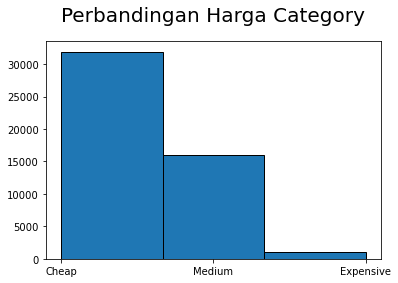

In [230]:
hist = df['category']

plt.hist(hist, bins=3, edgecolor='k')
plt.title('Perbandingan Harga Category', size=20, pad=20)
plt.show()

### Visualisasi Keseluruhan

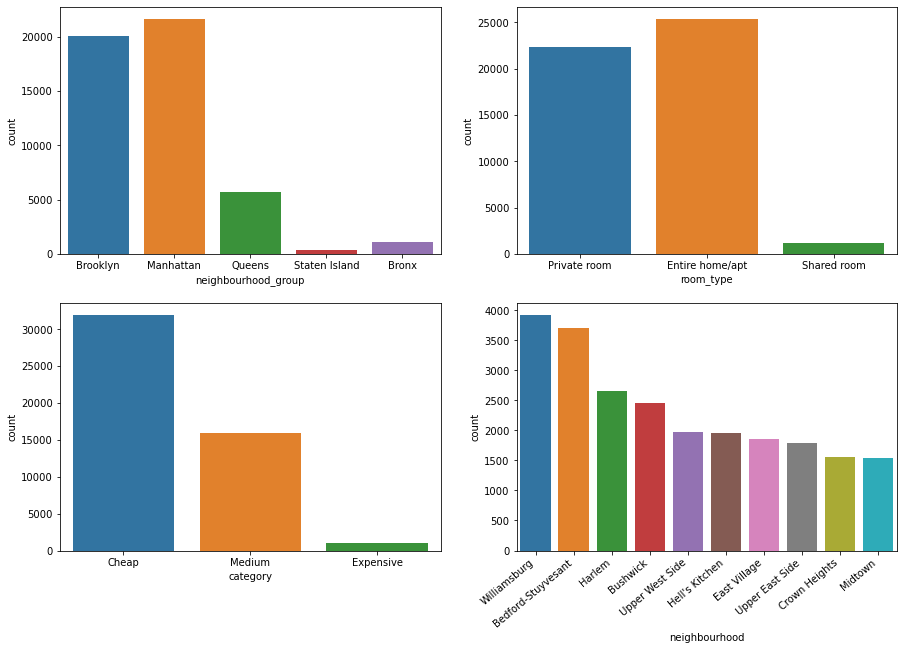

In [235]:
import seaborn as sns
plt.figure(figsize=(15,10))

ax=plt.subplot(221)
sns.countplot(x='neighbourhood_group', data=df)

ax=plt.subplot(222)
sns.countplot(x='room_type', data=df)

ax=plt.subplot(223)
sns.countplot(x='category', data=df)

ax=plt.subplot(224)
sns.countplot(x='neighbourhood', order=df.neighbourhood.value_counts().iloc[:10].index, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()